In [0]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [3]:
trainset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
batch_size=4
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27842929.44it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 450584.06it/s]
  1%|          | 16384/1648877 [00:00<00:11, 144663.14it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7170192.17it/s]                            
8192it [00:00, 185319.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [5]:
dataiter=iter(trainloader)
images,labels=next(dataiter)
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
4


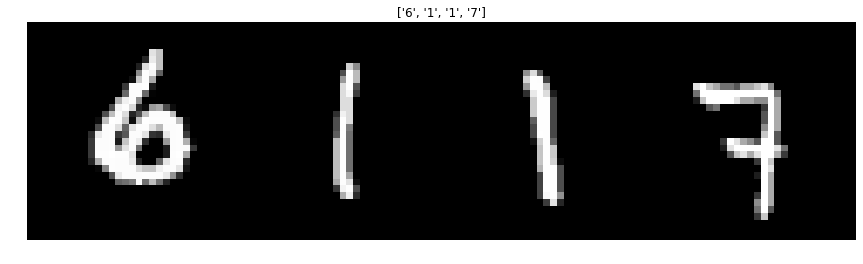

In [25]:
def imshow(img,title):
    plt.figure(figsize=(batch_size*4,4))
    plt.axis('off')
    plt.imshow(np.transpose(img,(1,2,0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images,labels=next(iter(dataloader))
    img=torchvision.utils.make_grid(images)
    imshow(img,title=[str(x.item()) for x in labels])
    return images,labels

images,labeks=show_batch_images(trainloader)

#Batch 
Normalisation

In [0]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.classifier=nn.Sequential(
        nn.Linear(784,48),
        nn.ReLU(48),
        nn.Linear(48,24),
        nn.ReLU(24),
        nn.Linear(24,10)
        )
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
        return x
class MyNetBN(nn.Module):
    def __init__(self):
        super(MyNetBN,self).__init__()
        self.classifier=nn.Sequential(
        nn.Linear(784,48),
        nn.BatchNorm1d(48),
        nn.ReLU(48),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(24),
        nn.Linear(24,10)
        )
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
        return x

In [34]:
model=MyNet()
print(model)
model_bn=MyNetBN()
print(model_bn)

MyNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)
MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [0]:
batch_size=512
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)


loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model.parameters(),lr=0.01)
opt_bn=optim.SGD(model_bn.parameters(),lr=0.01)


0.053029705 0.17602518 -0.10919285 0.1012654


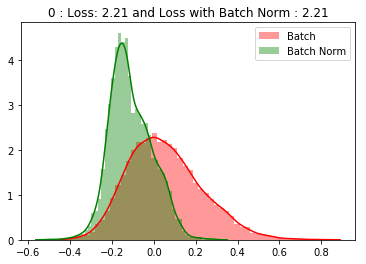

0.05731759 0.18192871 -0.1101733 0.106012516


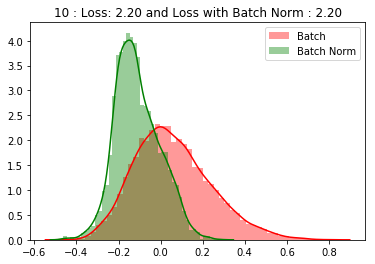

0.06139588 0.19011955 -0.11048311 0.10972547


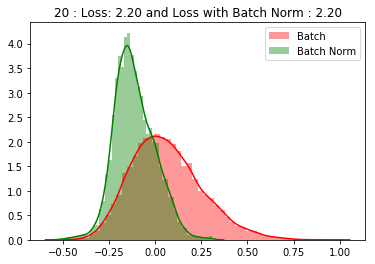

0.06300719 0.19073498 -0.109098986 0.111310296


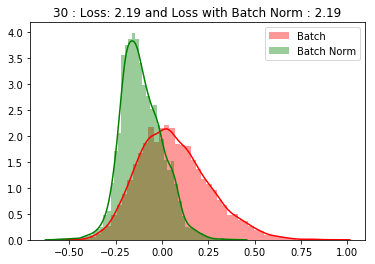

0.06830578 0.20183167 -0.11198668 0.11877825


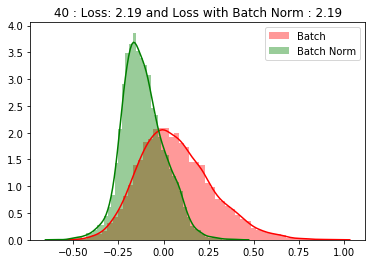

0.0741736 0.20848507 -0.11434746 0.12505096


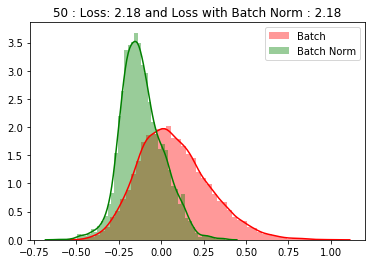

0.078530185 0.21798377 -0.11475197 0.13060832


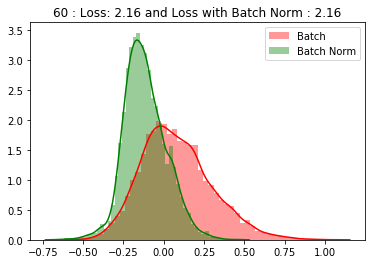

0.08486247 0.22405258 -0.11662364 0.13767275


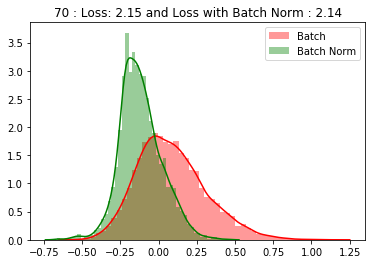

0.08784035 0.23208027 -0.116522886 0.1459576


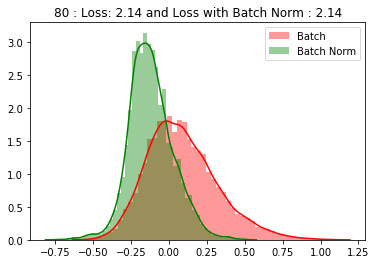

0.09638646 0.24259269 -0.117911234 0.15345734


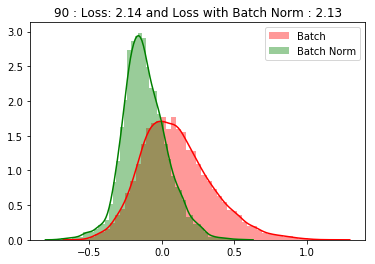

0.10266135 0.25194195 -0.12080015 0.16559964


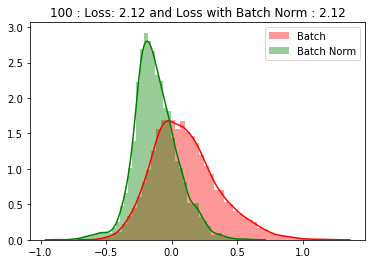

0.10926255 0.26087415 -0.124209665 0.1753777


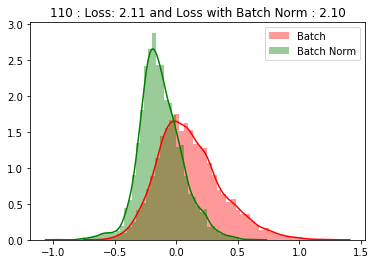

0.1118579 0.26838112 -0.12280758 0.17663406


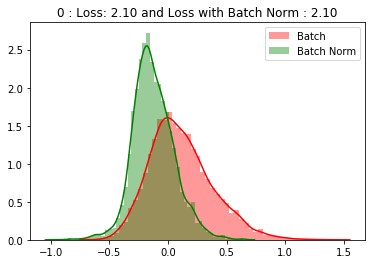

0.11763843 0.27560607 -0.12476361 0.18513487


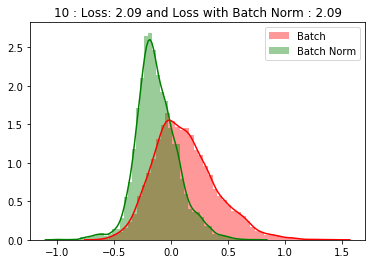

0.13154836 0.292173 -0.12955959 0.2040366


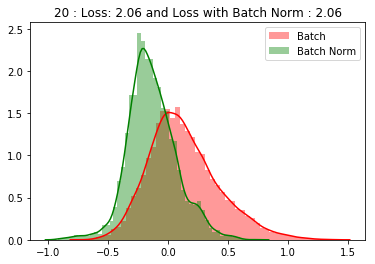

0.13617225 0.3011568 -0.13048348 0.2154137


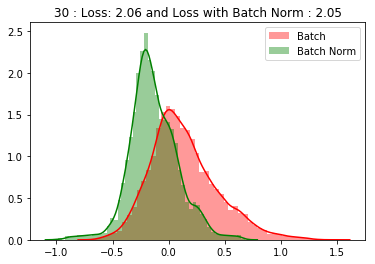

0.15106374 0.31675032 -0.13432716 0.23190969


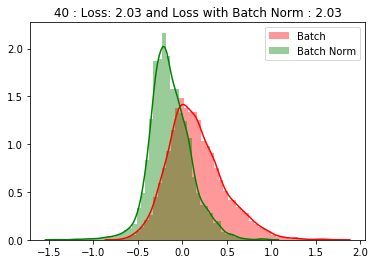

0.14924866 0.31412902 -0.13017523 0.2262308


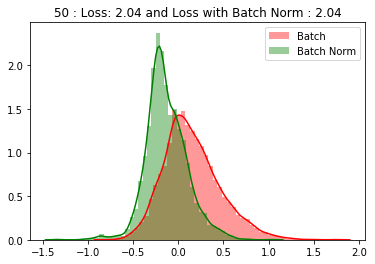

0.16573116 0.33053592 -0.13642994 0.252308


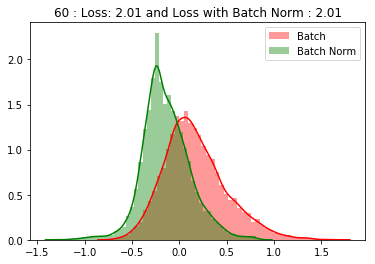

0.17521806 0.34669894 -0.13821205 0.2678283


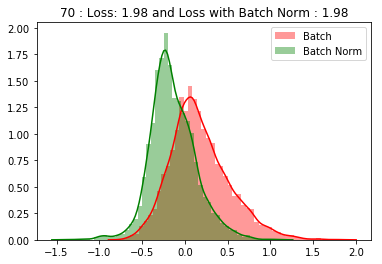

0.18201791 0.3640235 -0.13870624 0.28923035


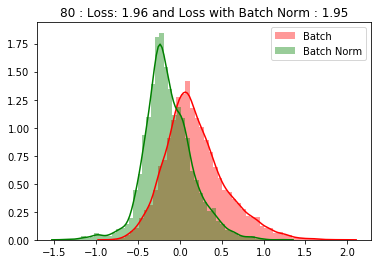

0.20201688 0.37429398 -0.14450398 0.30305064


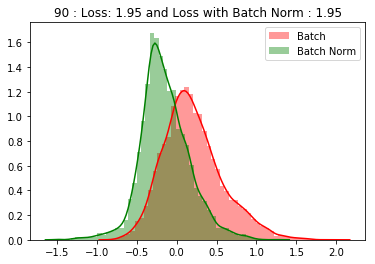

0.20351891 0.38780653 -0.14308253 0.31872898


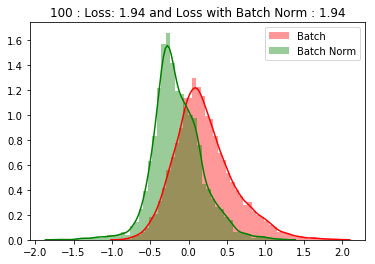

0.21592532 0.397169 -0.14595883 0.3336328


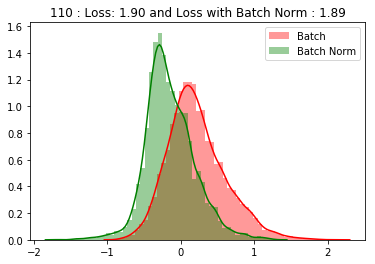

0.21638191 0.4068867 -0.14407316 0.34489402


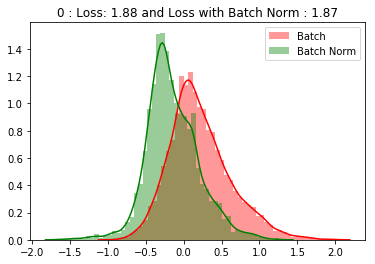

0.24442442 0.43281397 -0.15424378 0.38464198


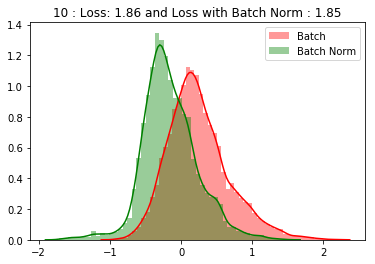

0.25524226 0.45104164 -0.15608296 0.4125011


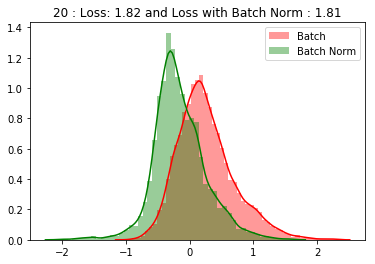

0.2663052 0.46263564 -0.15691581 0.42980438


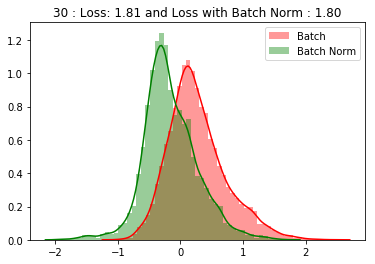

0.2667199 0.46574858 -0.15151377 0.4225052


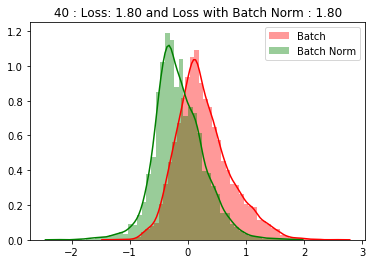

0.28510916 0.5037285 -0.15532061 0.47987178


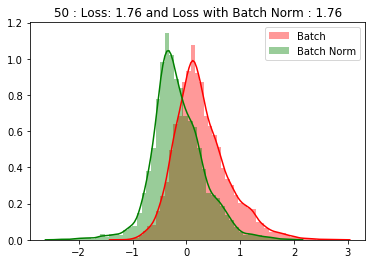

0.3006203 0.51542085 -0.16147743 0.49650806


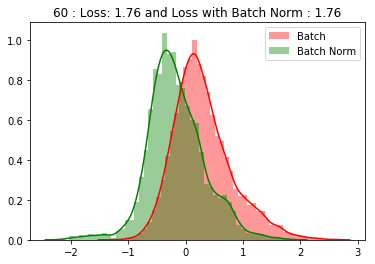

0.32153502 0.5328882 -0.16104935 0.5103929


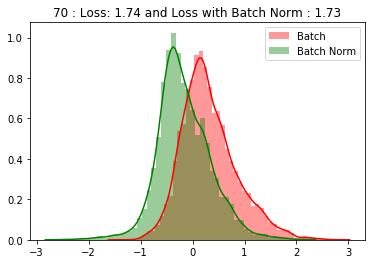

0.3385006 0.55575305 -0.16509756 0.54523927


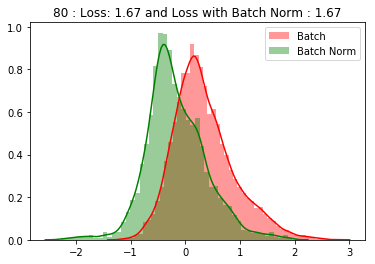

0.35089505 0.57328683 -0.1671688 0.5707127


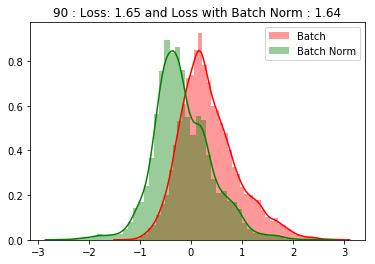

0.37561712 0.60088485 -0.17105608 0.61522925


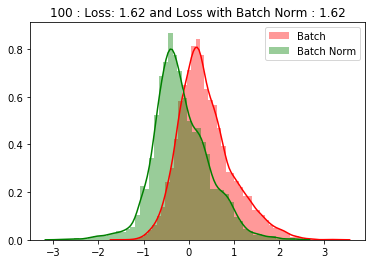

0.37641516 0.60785943 -0.16893223 0.6283106


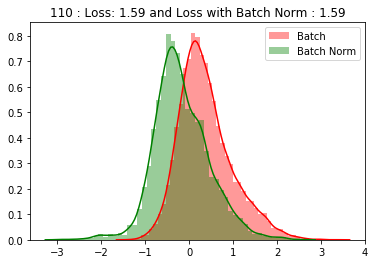

0.38992015 0.6339845 -0.17021999 0.6654925


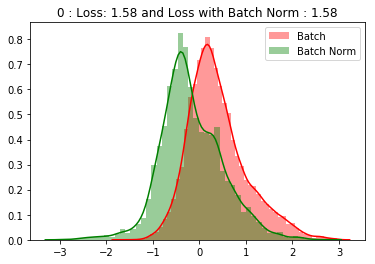

0.41307154 0.6589091 -0.17164654 0.7033456


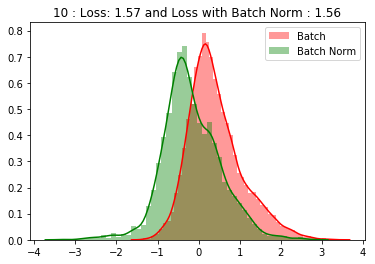

0.43738306 0.68180525 -0.1787633 0.73687106


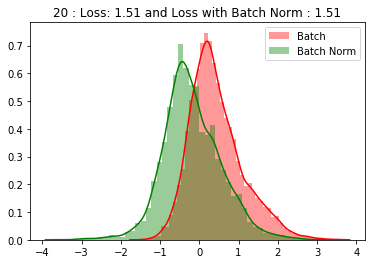

0.45388708 0.70032233 -0.17966592 0.77487326


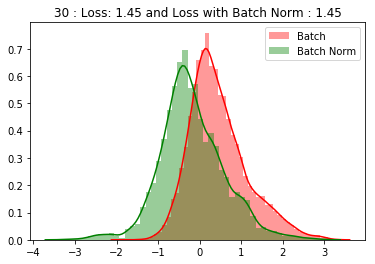

0.4618827 0.7125167 -0.177561 0.7901365


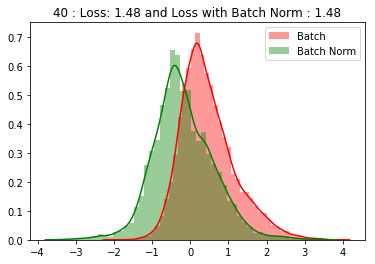

0.48278007 0.7333732 -0.18029776 0.82255834


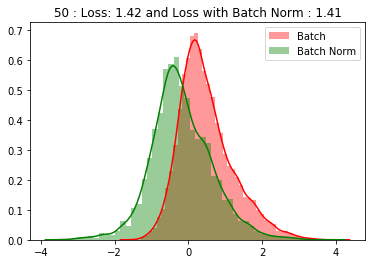

0.49702597 0.74965185 -0.1809355 0.84874415


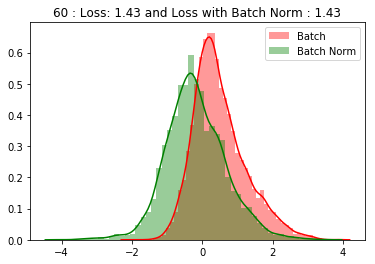

0.52549976 0.78375226 -0.19088721 0.9121834


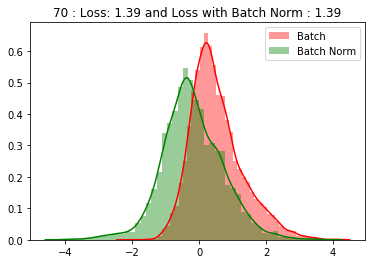

0.52800864 0.79699296 -0.18939611 0.93941873


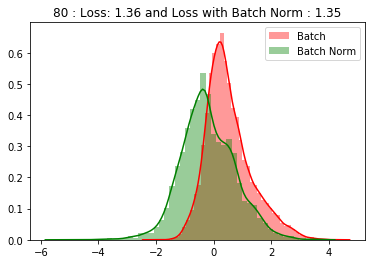

0.57057446 0.8193428 -0.20280257 0.9970225


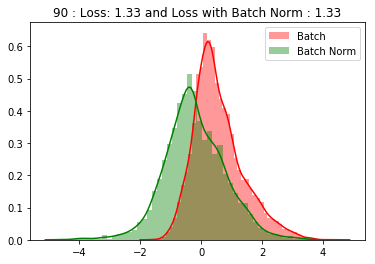

0.5965954 0.8505167 -0.20329194 1.0295058


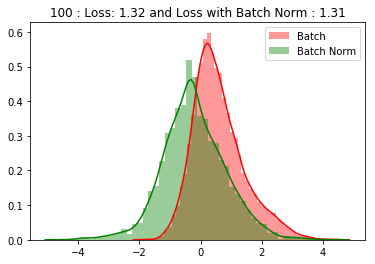

0.6080826 0.86404425 -0.20217952 1.0620623


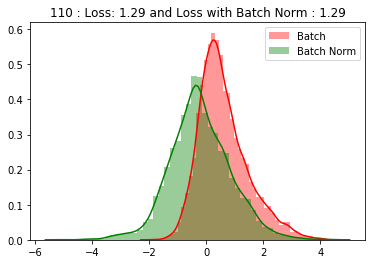

0.62047976 0.88153887 -0.20564747 1.0787189


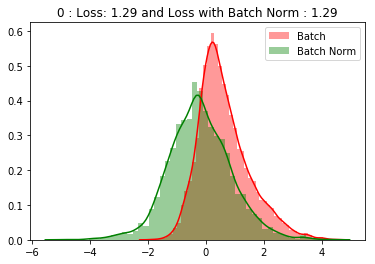

0.6267018 0.897179 -0.20282209 1.1277348


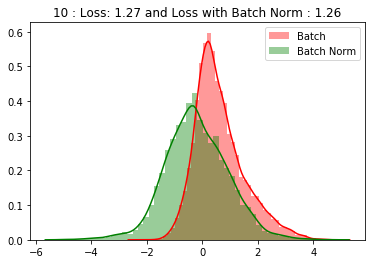

0.65836173 0.9177356 -0.20707493 1.1515315


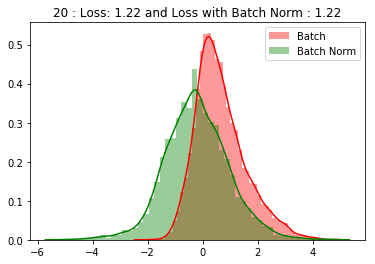

0.67252445 0.94558096 -0.2092357 1.2210833


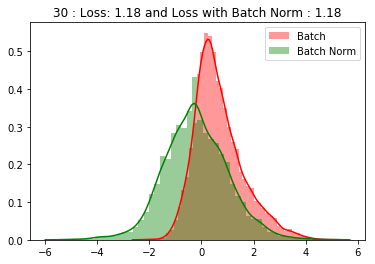

0.695391 0.95892733 -0.2108527 1.2455603


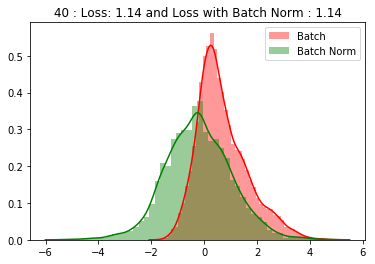

0.7225078 0.9869268 -0.22058778 1.2931415


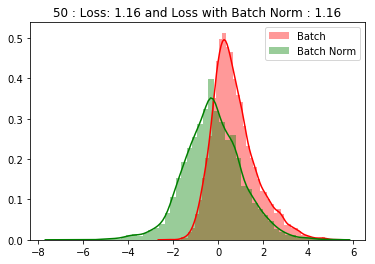

0.73596936 1.0084617 -0.21956727 1.3417517


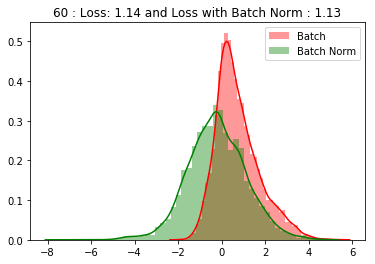

0.7573406 1.0425384 -0.22419986 1.3948022


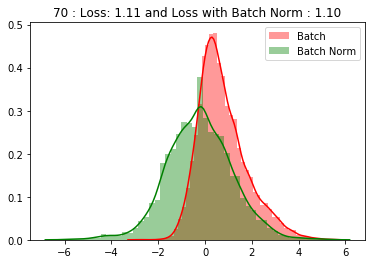

0.77171475 1.0807189 -0.22401237 1.4810511


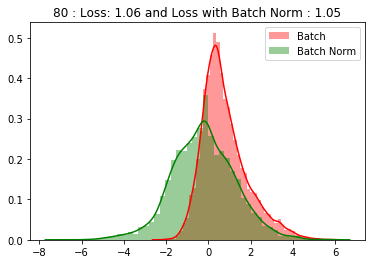

0.7754374 1.0541065 -0.22495666 1.4278014


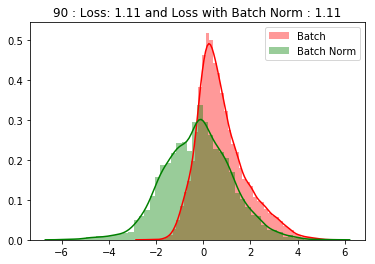

0.79933625 1.0837291 -0.22783935 1.5161875


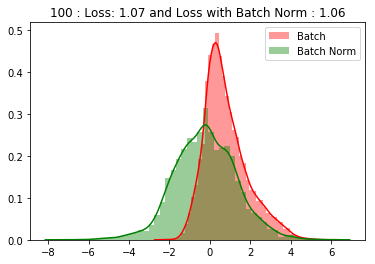

0.8219176 1.109989 -0.2281384 1.555952


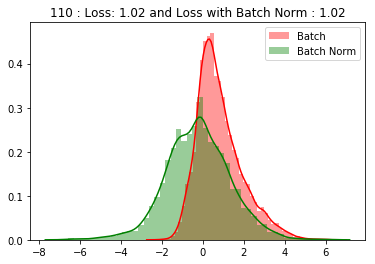

0.835134 1.1336566 -0.23164412 1.6053255


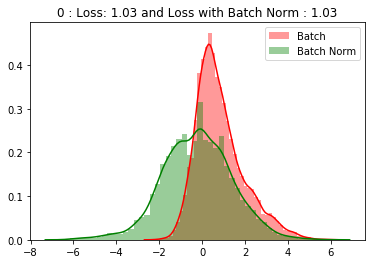

0.8710467 1.14331 -0.23849583 1.6193705


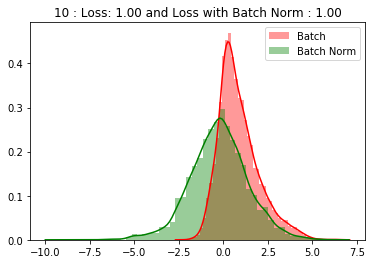

0.886604 1.1696305 -0.24665983 1.6796852


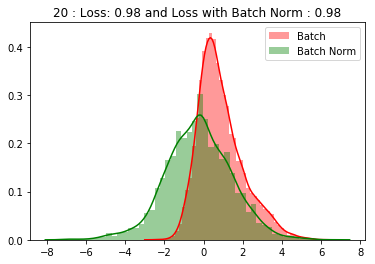

0.91324854 1.2038819 -0.24970794 1.7479534


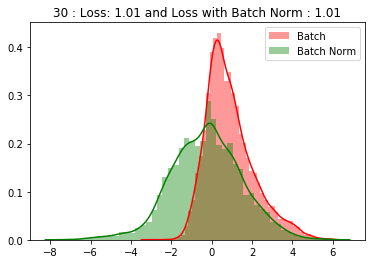

0.91416186 1.2035599 -0.24921437 1.7575653


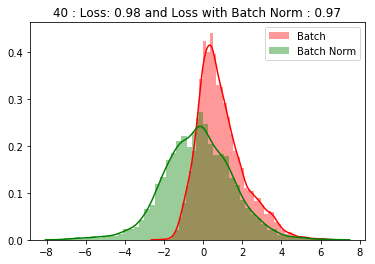

0.91286063 1.2105912 -0.24183612 1.7516983


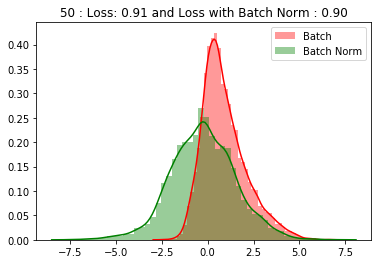

0.9292428 1.2061193 -0.25284845 1.7722754


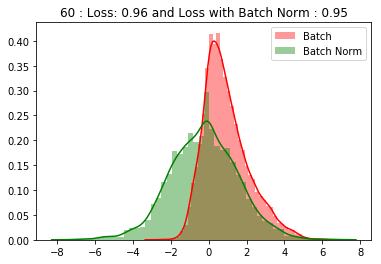

0.98620105 1.2626367 -0.26333243 1.8842723


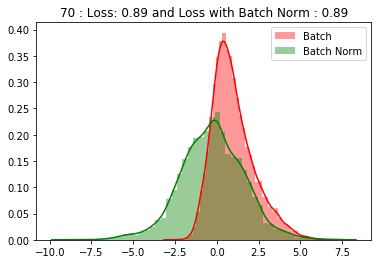

0.98362774 1.2948565 -0.25458565 1.9191399


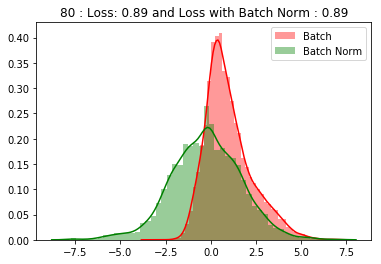

0.9944375 1.2805636 -0.24873677 1.8990177


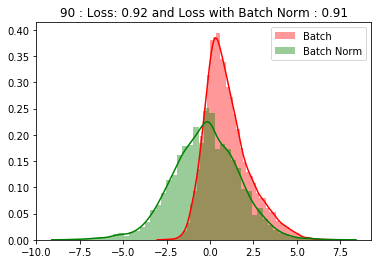

1.0022348 1.2953347 -0.24945655 1.941706


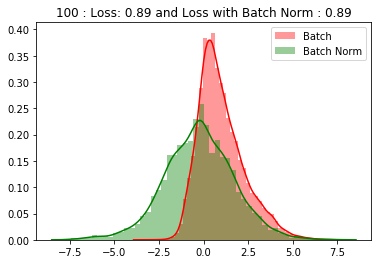

1.0222673 1.2965258 -0.26681837 1.9706085


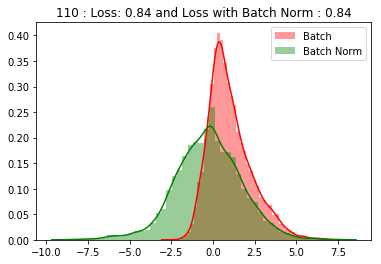

1.0302835 1.295469 -0.2647775 1.9452535


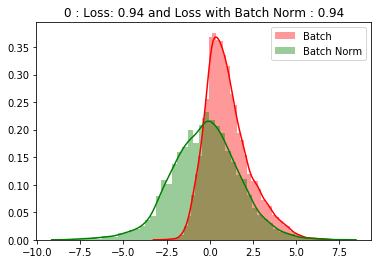

1.0509039 1.3346232 -0.2720438 2.0280545


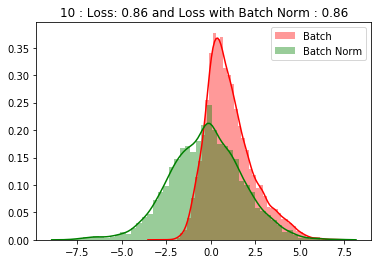

1.0606372 1.3614581 -0.26778778 2.094039


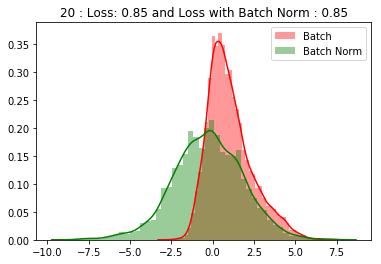

1.0869639 1.3521136 -0.27709886 2.0898101


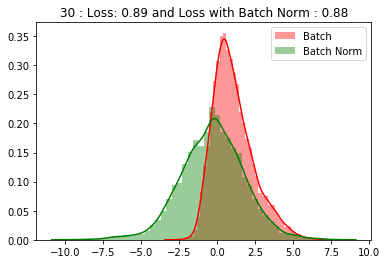

1.0991324 1.4206991 -0.26941204 2.2120907


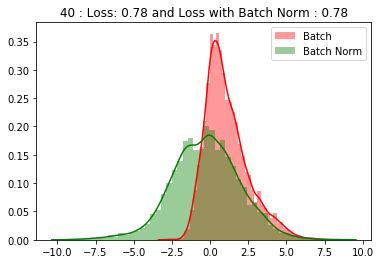

1.1132426 1.3958721 -0.2750917 2.2030523


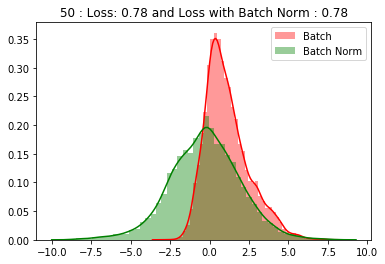

1.1446147 1.4433358 -0.27234071 2.2592785


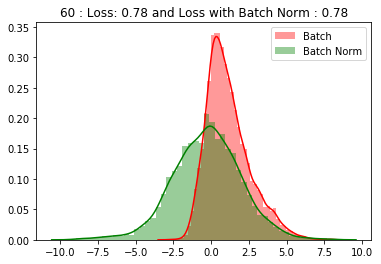

1.1318225 1.4488138 -0.26739383 2.2841833


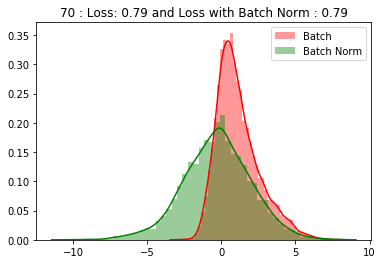

1.1578966 1.454772 -0.27162865 2.3112383


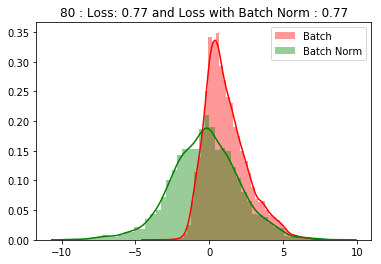

1.1411386 1.4359287 -0.2742799 2.2984433


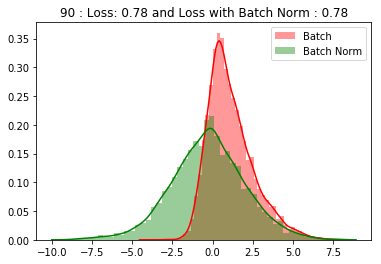

1.186267 1.4707888 -0.29214555 2.3731937


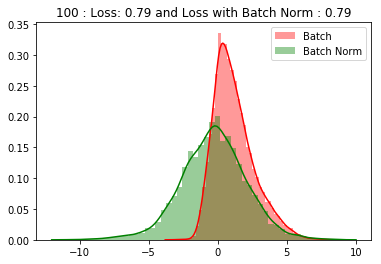

1.1879774 1.4661962 -0.29456705 2.3553348


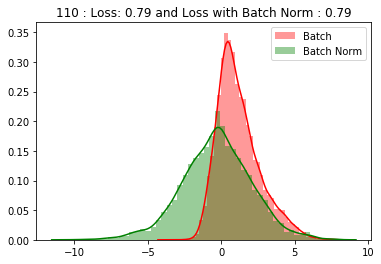

1.1799817 1.4809363 -0.28633925 2.3825417


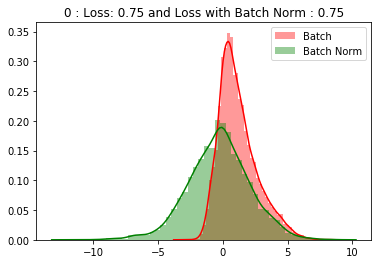

1.2340679 1.5043197 -0.2984991 2.4355052


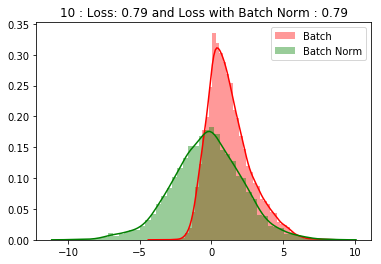

1.1711601 1.4903928 -0.28167775 2.4238932


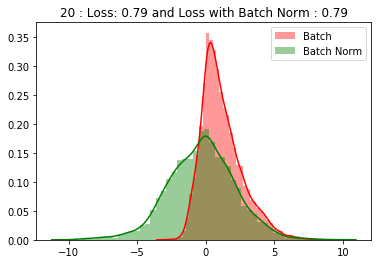

1.2092795 1.5244929 -0.28593415 2.487277


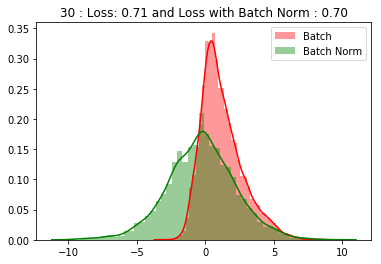

1.1916538 1.53434 -0.27252382 2.5249395


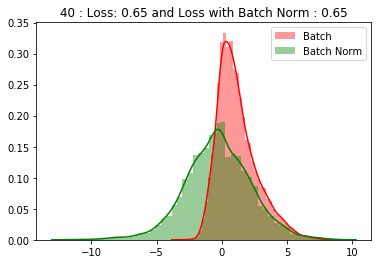

1.2468883 1.5403734 -0.31256858 2.5542123


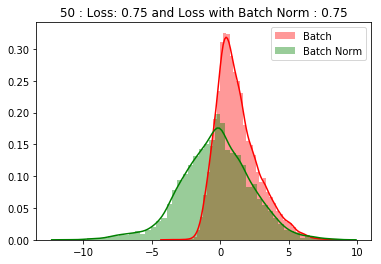

1.2410816 1.5660615 -0.28591713 2.597998


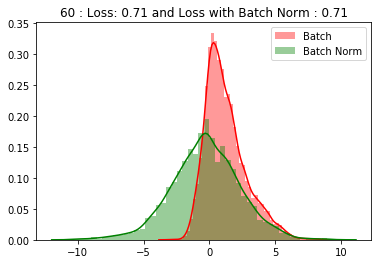

1.2673124 1.5609504 -0.30926234 2.5788608


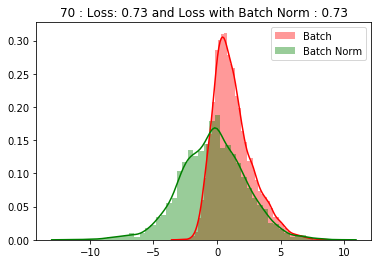

1.2588972 1.5954418 -0.2974406 2.6371038


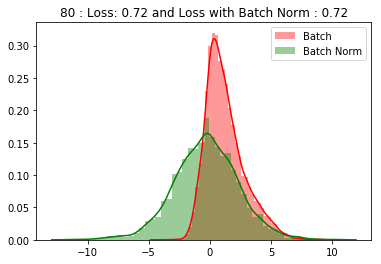

1.3027878 1.6027896 -0.30212766 2.6502686


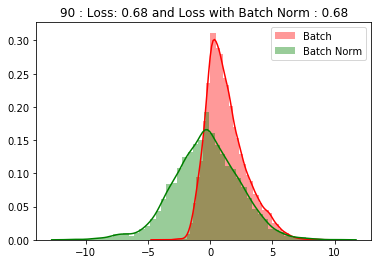

1.3082967 1.6262207 -0.3054993 2.7100556


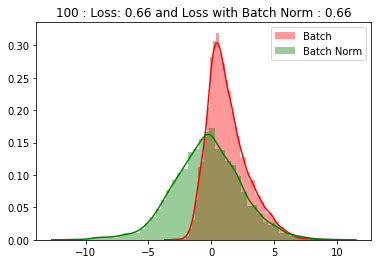

1.3057714 1.6089448 -0.2956127 2.713558


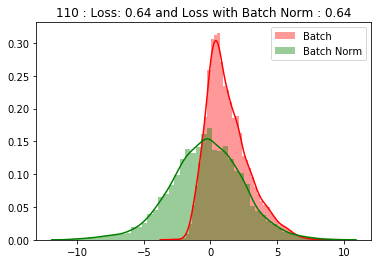

1.3089598 1.6124852 -0.2979694 2.6955056


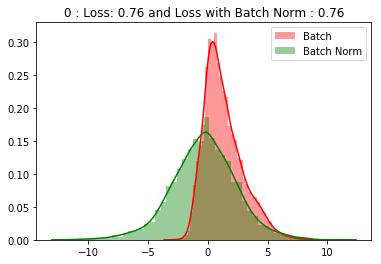

1.3039905 1.6030889 -0.3129395 2.7310815


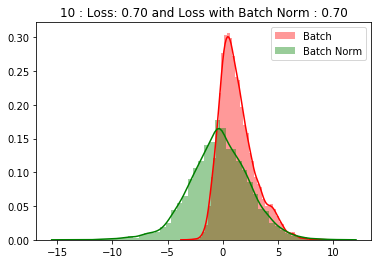

1.3028406 1.6144912 -0.29187456 2.6890993


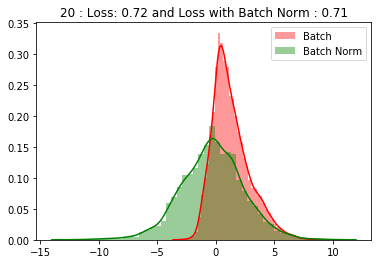

1.352169 1.6653286 -0.29869542 2.823891


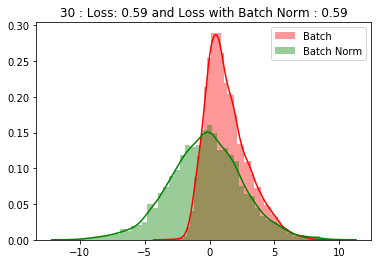

1.3495549 1.6448133 -0.3115078 2.8169627


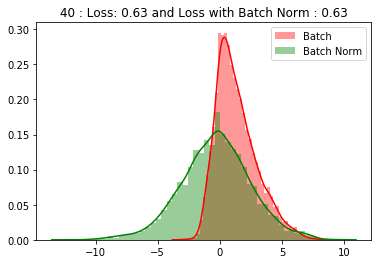

1.3462011 1.6509832 -0.31956863 2.8596468


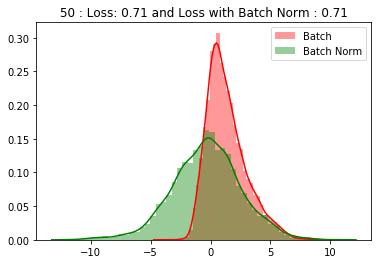

1.3818355 1.6628952 -0.319895 2.8574717


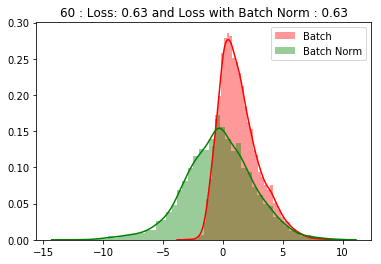

1.3813146 1.6735067 -0.31135112 2.8601592


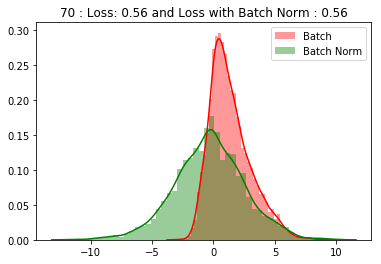

1.3891368 1.698511 -0.29835564 2.88027


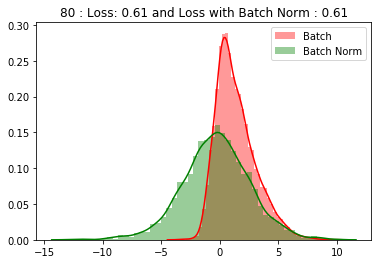

1.3956223 1.7007772 -0.31983462 2.9403512


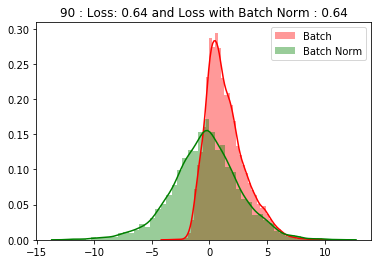

1.4097179 1.7017671 -0.30556265 2.925339


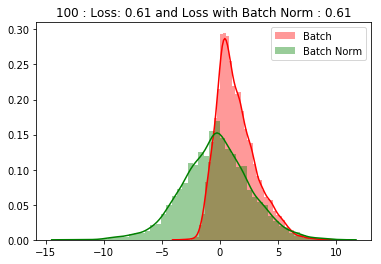

1.383514 1.6855953 -0.3178994 2.9307315


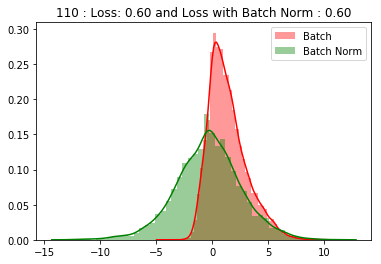

1.4181027 1.703385 -0.32077807 2.9270835


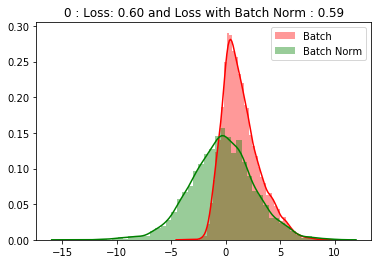

1.4034129 1.713858 -0.30422604 2.9440095


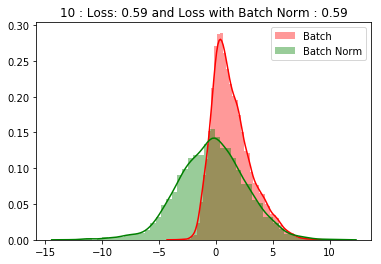

1.4016525 1.7029318 -0.30850965 2.9615946


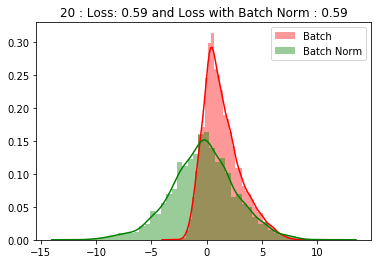

1.4028496 1.728824 -0.3154441 3.0222304


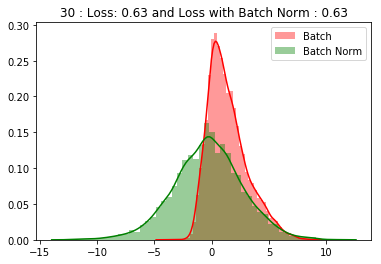

1.4499955 1.7722336 -0.3174591 3.1101248


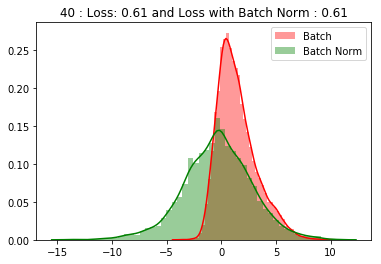

1.4406915 1.7408947 -0.31700143 3.083296


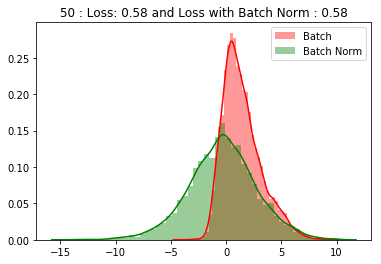

1.4289213 1.7514161 -0.30370933 3.063072


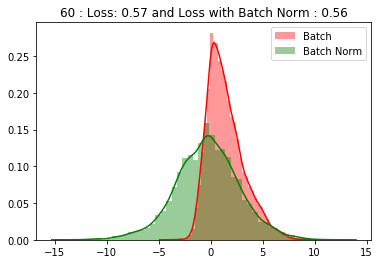

1.4667892 1.7799096 -0.31096548 3.1018472


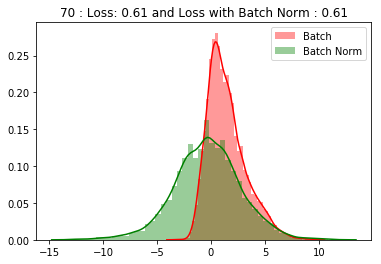

1.4714231 1.7871348 -0.30754408 3.1441026


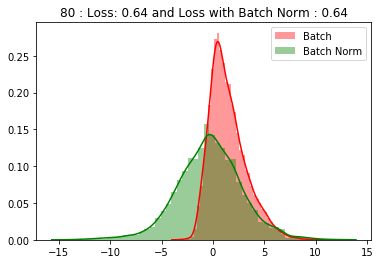

1.4771951 1.7814834 -0.31808856 3.1414547


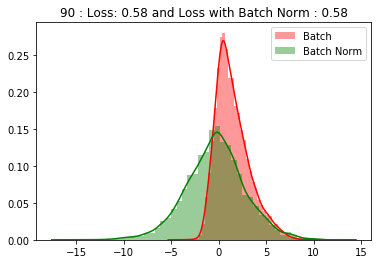

1.4672375 1.7702466 -0.329508 3.128012


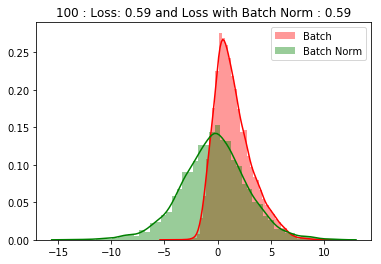

1.4636394 1.7854105 -0.31809884 3.1552122


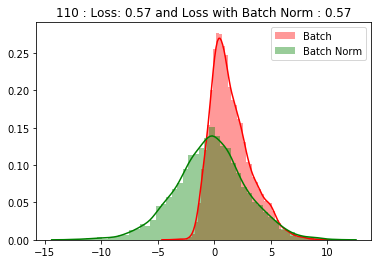

In [39]:
loss_arr=[]
loss_bn_arr=[]
max_epochs=10

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader):
        inputs,labels=data
        
        opt.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        
        opt_bn.zero_grad()
        outputs=model(inputs)
        loss_bn=loss_fn(outputs,labels)
        loss_bn.backward()
        opt_bn.step()
        
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

        if i % 10 ==0:
            inputs=inputs.view(inputs.size(0),-1)
            
            model.eval()
            model_bn.eval()
            
            
            a=model.classifier[0](inputs)
            a=model.classifier[1](a)
            a=model.classifier[2](a)
            a=a.detach().numpy().ravel()
            sns.distplot(a,kde=True,color='r',label='Batch')
            
            b=model.classifier[0](inputs)
            b=model.classifier[1](b)
            b=model.classifier[2](b)
            b=model.classifier[3](b)
            b=model.classifier[4](b)
            b=b.detach().numpy().ravel()
            sns.distplot(b,kde=True,color='g',label='Batch Norm')
            
            print(np.mean(a),np.std(a),np.mean(b),np.std(b))
            plt.title('%d : Loss: %0.2f and Loss with Batch Norm : %0.2f' %(i,loss.item(),loss_bn.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            model.train()
            model_bn.train()
        

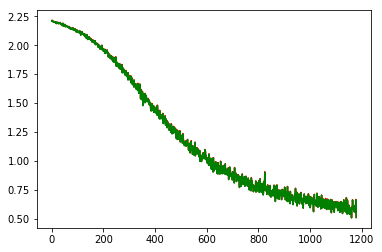

In [42]:
plt.plot(loss_arr,color='r')
plt.plot(loss_bn_arr,color='g')
plt.show()